Imports

In [16]:
import cv2
import numpy as np
import skimage
import imageio
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

Read and Display Images

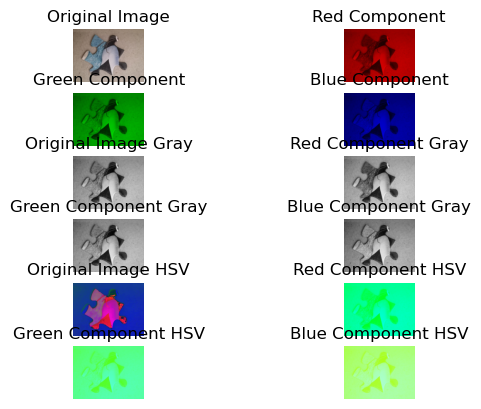

In [17]:
img = cv2.imread('Images/image-35.jpg')
img = img[:,:,::-1]
red, green, blue = cv2.split(img)
empty = red * 0

red_image = cv2.merge([red, empty, empty])
green_image = cv2.merge([empty, green, empty])
blue_image = cv2.merge([empty, empty, blue])

plt.subplot(6, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(6, 2, 2)
plt.imshow(red_image)
plt.title('Red Component')
plt.axis('off')

plt.subplot(6, 2, 3)
plt.imshow(green_image)
plt.title('Green Component')
plt.axis('off')

plt.subplot(6, 2, 4)
plt.imshow(blue_image)
plt.title('Blue Component')
plt.axis('off')

plt.subplot(6, 2, 5)
plt.imshow(skimage.color.rgb2gray(img),cmap="gray")
plt.title('Original Image Gray')
plt.axis('off')

plt.subplot(6, 2, 6)
plt.imshow(skimage.color.rgb2gray(red_image),cmap="gray")
plt.title('Red Component Gray')
plt.axis('off')

plt.subplot(6, 2, 7)
plt.imshow(skimage.color.rgb2gray(green_image),cmap="gray")
plt.title('Green Component Gray')
plt.axis('off')

plt.subplot(6, 2, 8)
plt.imshow(skimage.color.rgb2gray(blue_image),cmap="gray")
plt.title('Blue Component Gray')
plt.axis('off')

plt.subplot(6, 2, 9)
plt.imshow(skimage.color.rgb2hsv(img))
plt.title('Original Image HSV')
plt.axis('off')

plt.subplot(6, 2, 10)
plt.imshow(skimage.color.rgb2hsv(red_image))
plt.title('Red Component HSV')
plt.axis('off')

plt.subplot(6, 2, 11)
plt.imshow(skimage.color.rgb2hsv(green_image))
plt.title('Green Component HSV')
plt.axis('off')

plt.subplot(6, 2, 12)
plt.imshow(skimage.color.rgb2hsv(blue_image))
plt.title('Blue Component HSV')
plt.axis('off')

plt.show()


Section 4

In [18]:
print("1. Dimensions:",img.shape)
mask = skimage.color.rgb2gray(cv2.imread('Images/mask-35.png'))
white_pix = np.sum(mask==1)
print("2. Num white pixels:",white_pix)

#=========================================================================

gray_img = skimage.color.rgb2gray(img)
print("3. Max value in grayscale(Noramalized):",np.max(gray_img))

img_with_mask = gray_img*mask
print("4. Max pixel in puzzel(Normalized):",np.max(img_with_mask))

print("5. Mean intensity for image:",np.mean(gray_img))

print("6. Mean brightness of puzzle pixels",np.mean(gray_img[mask == 1]))

print("7. Mean brightness of background pixels",np.mean(gray_img[mask != 1]))

print("8. Variance of puzzle pixels",np.var(gray_img[mask == 1]))
print("9. Variance of bakground pixels",np.var(gray_img[mask != 1]))

1. Dimensions: (450, 600, 3)
2. Num white pixels: 73196
3. Max value in grayscale(Noramalized): 0.8985443137254902
4. Max pixel in puzzel(Normalized): 0.8985443137254902
5. Mean intensity for image: 0.5384709828395062
6. Mean brightness of puzzle pixels 0.4428718293081482
7. Mean brightness of background pixels 0.5740265388336998
8. Variance of puzzle pixels 0.03828601259838955
9. Variance of bakground pixels 0.008189250151975785


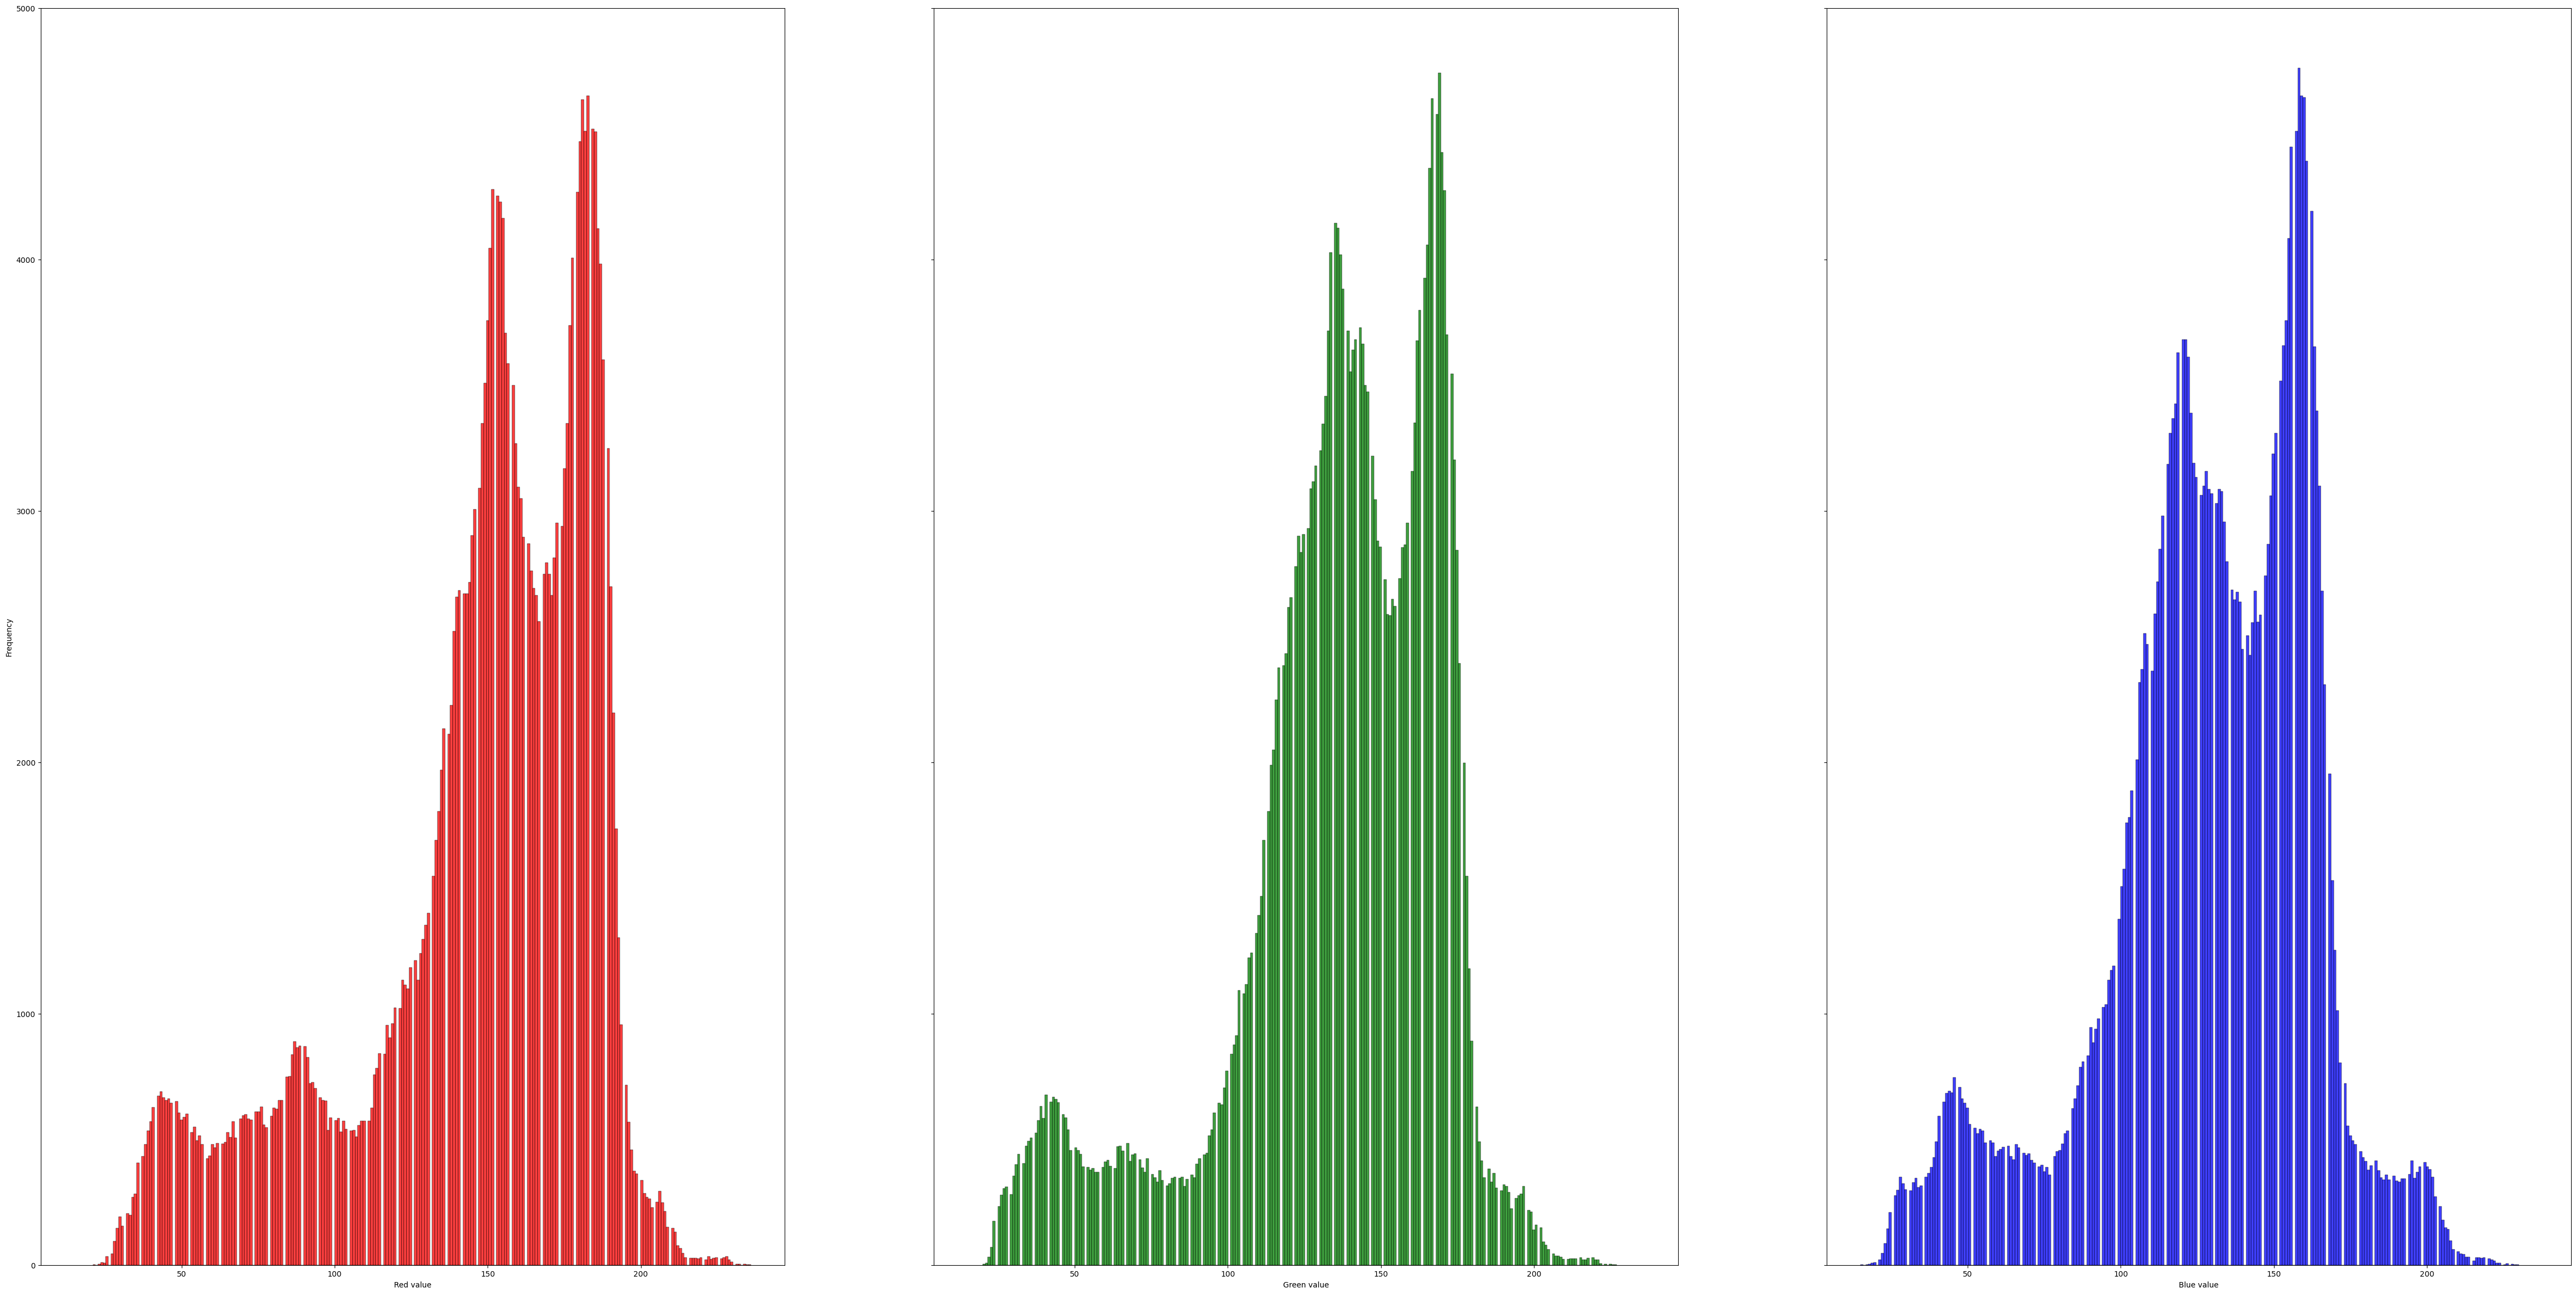

In [19]:
red_hist =  red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

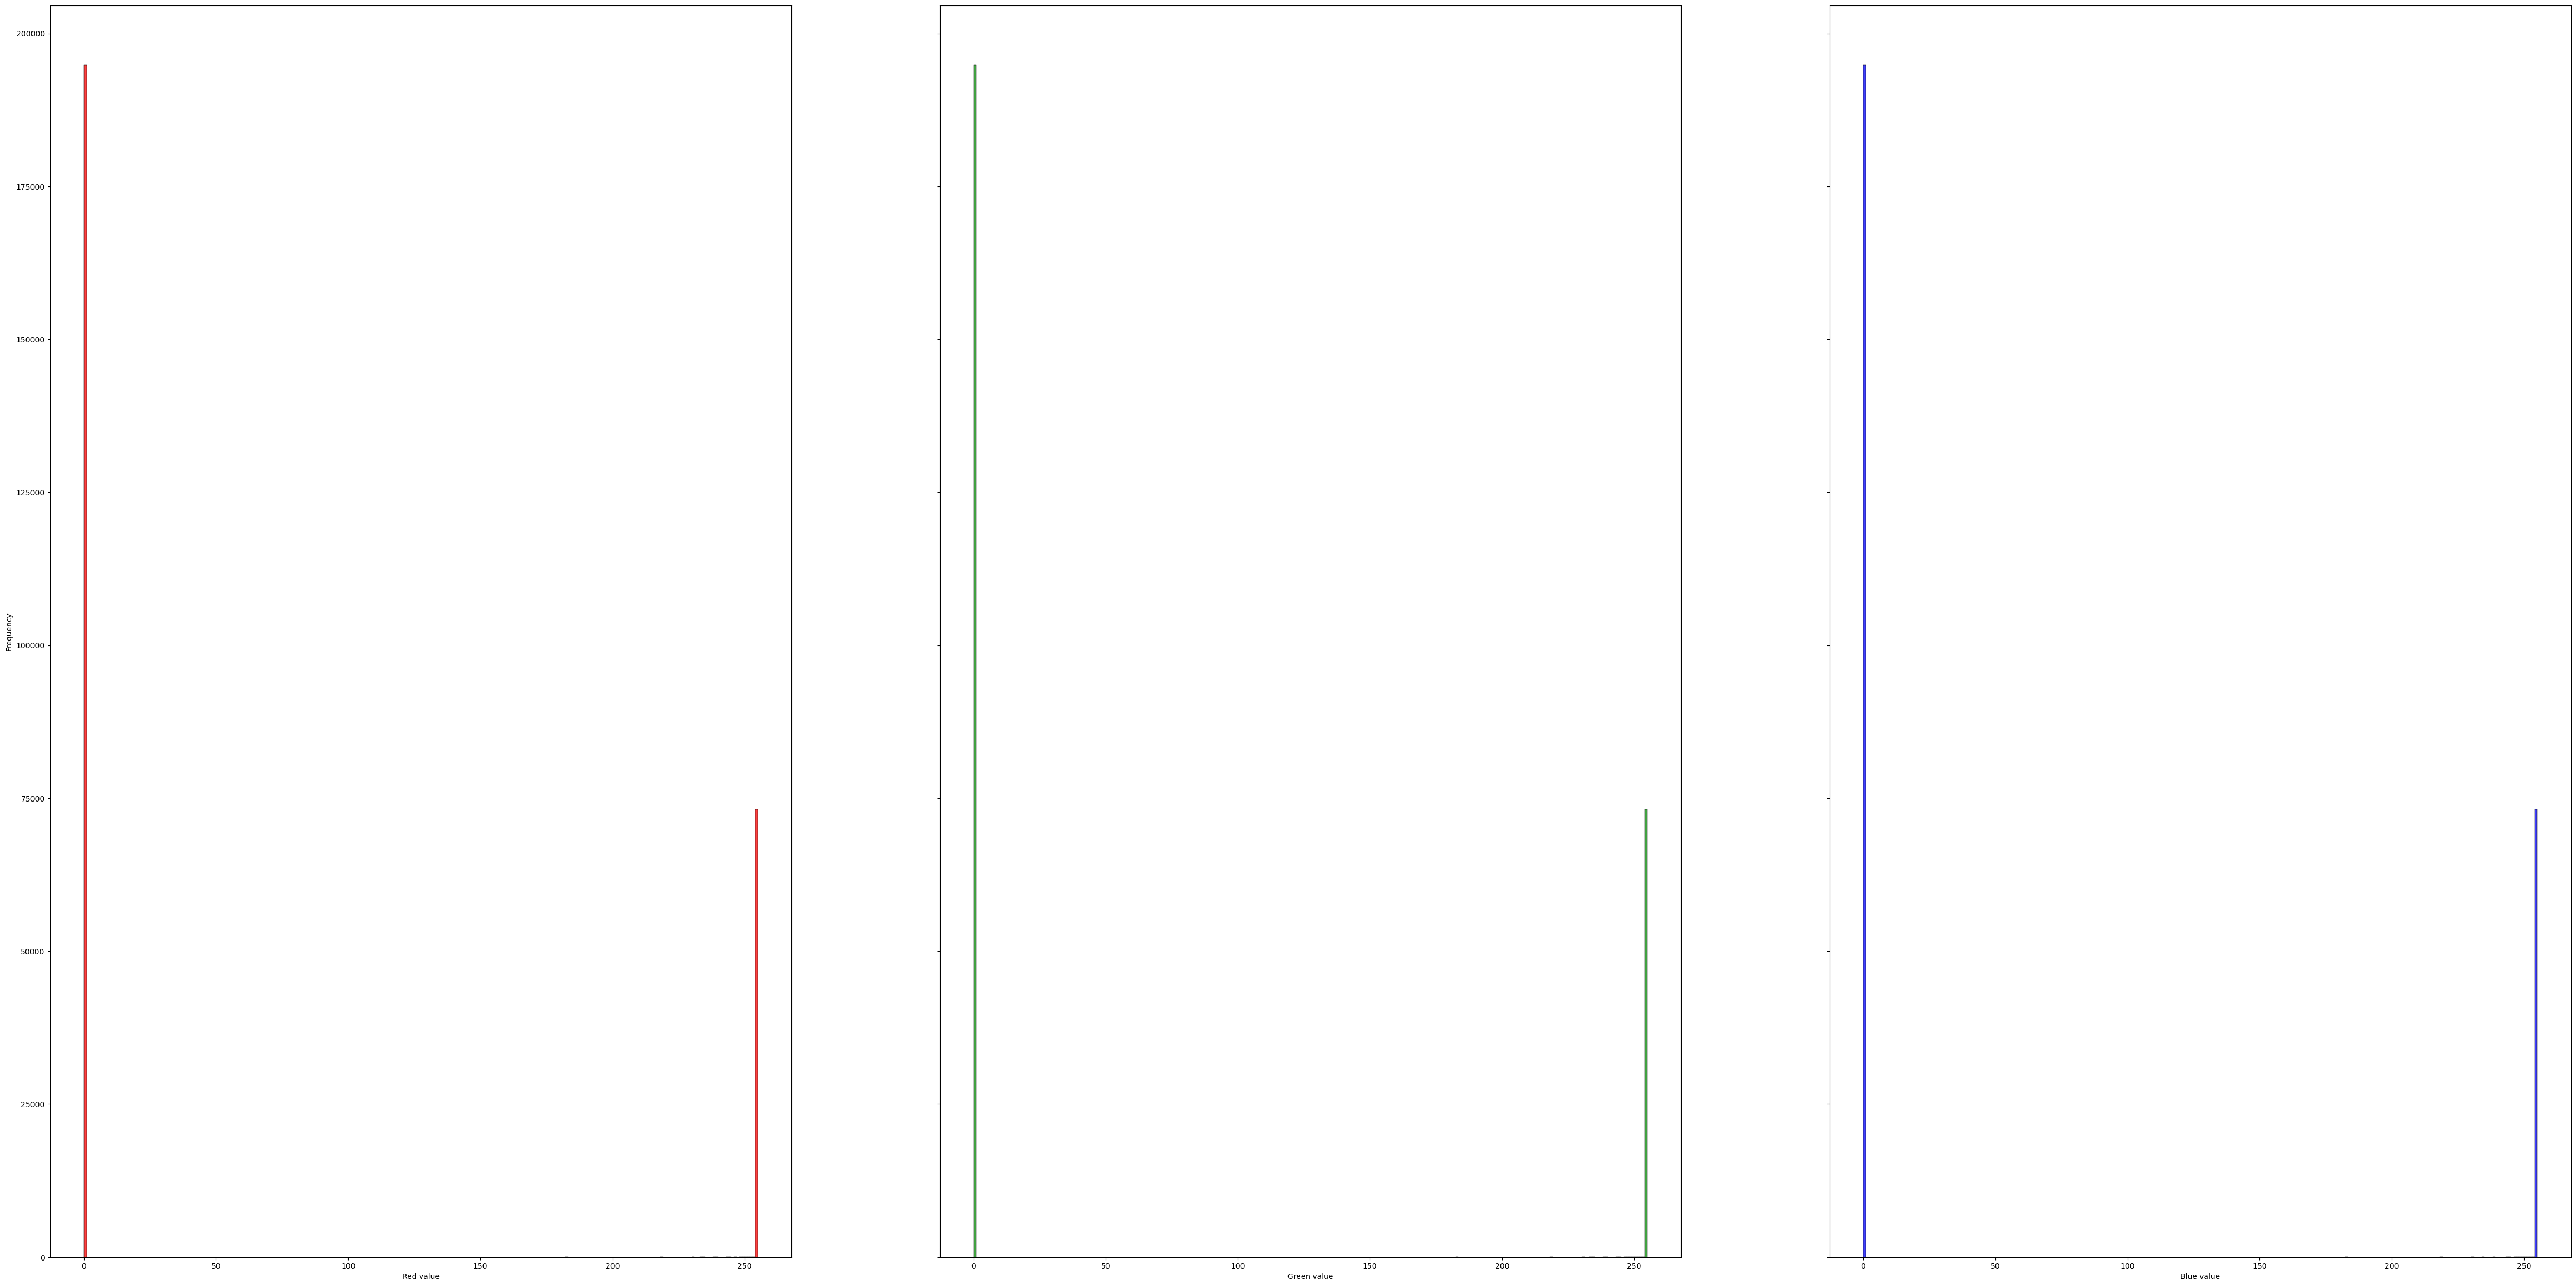

In [20]:
mask = cv2.imread("Images/mask-35.png")
mask = mask[:,:,::-1]

m_red ,m_green ,m_blue  = cv2.split(mask)

red_hist =  m_red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  m_green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  m_blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

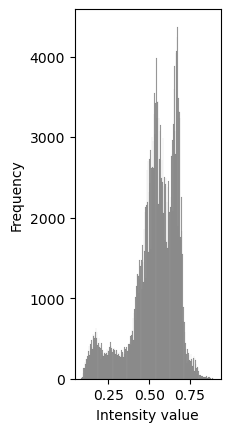

In [21]:
gray_hist =  gray_img.flatten()

plt.subplot(1,3,3)
sns.histplot( gray_hist, bins=256, kde=False,color='gray')
plt.xlabel("Intensity value")
plt.ylabel("Frequency")
plt.show()

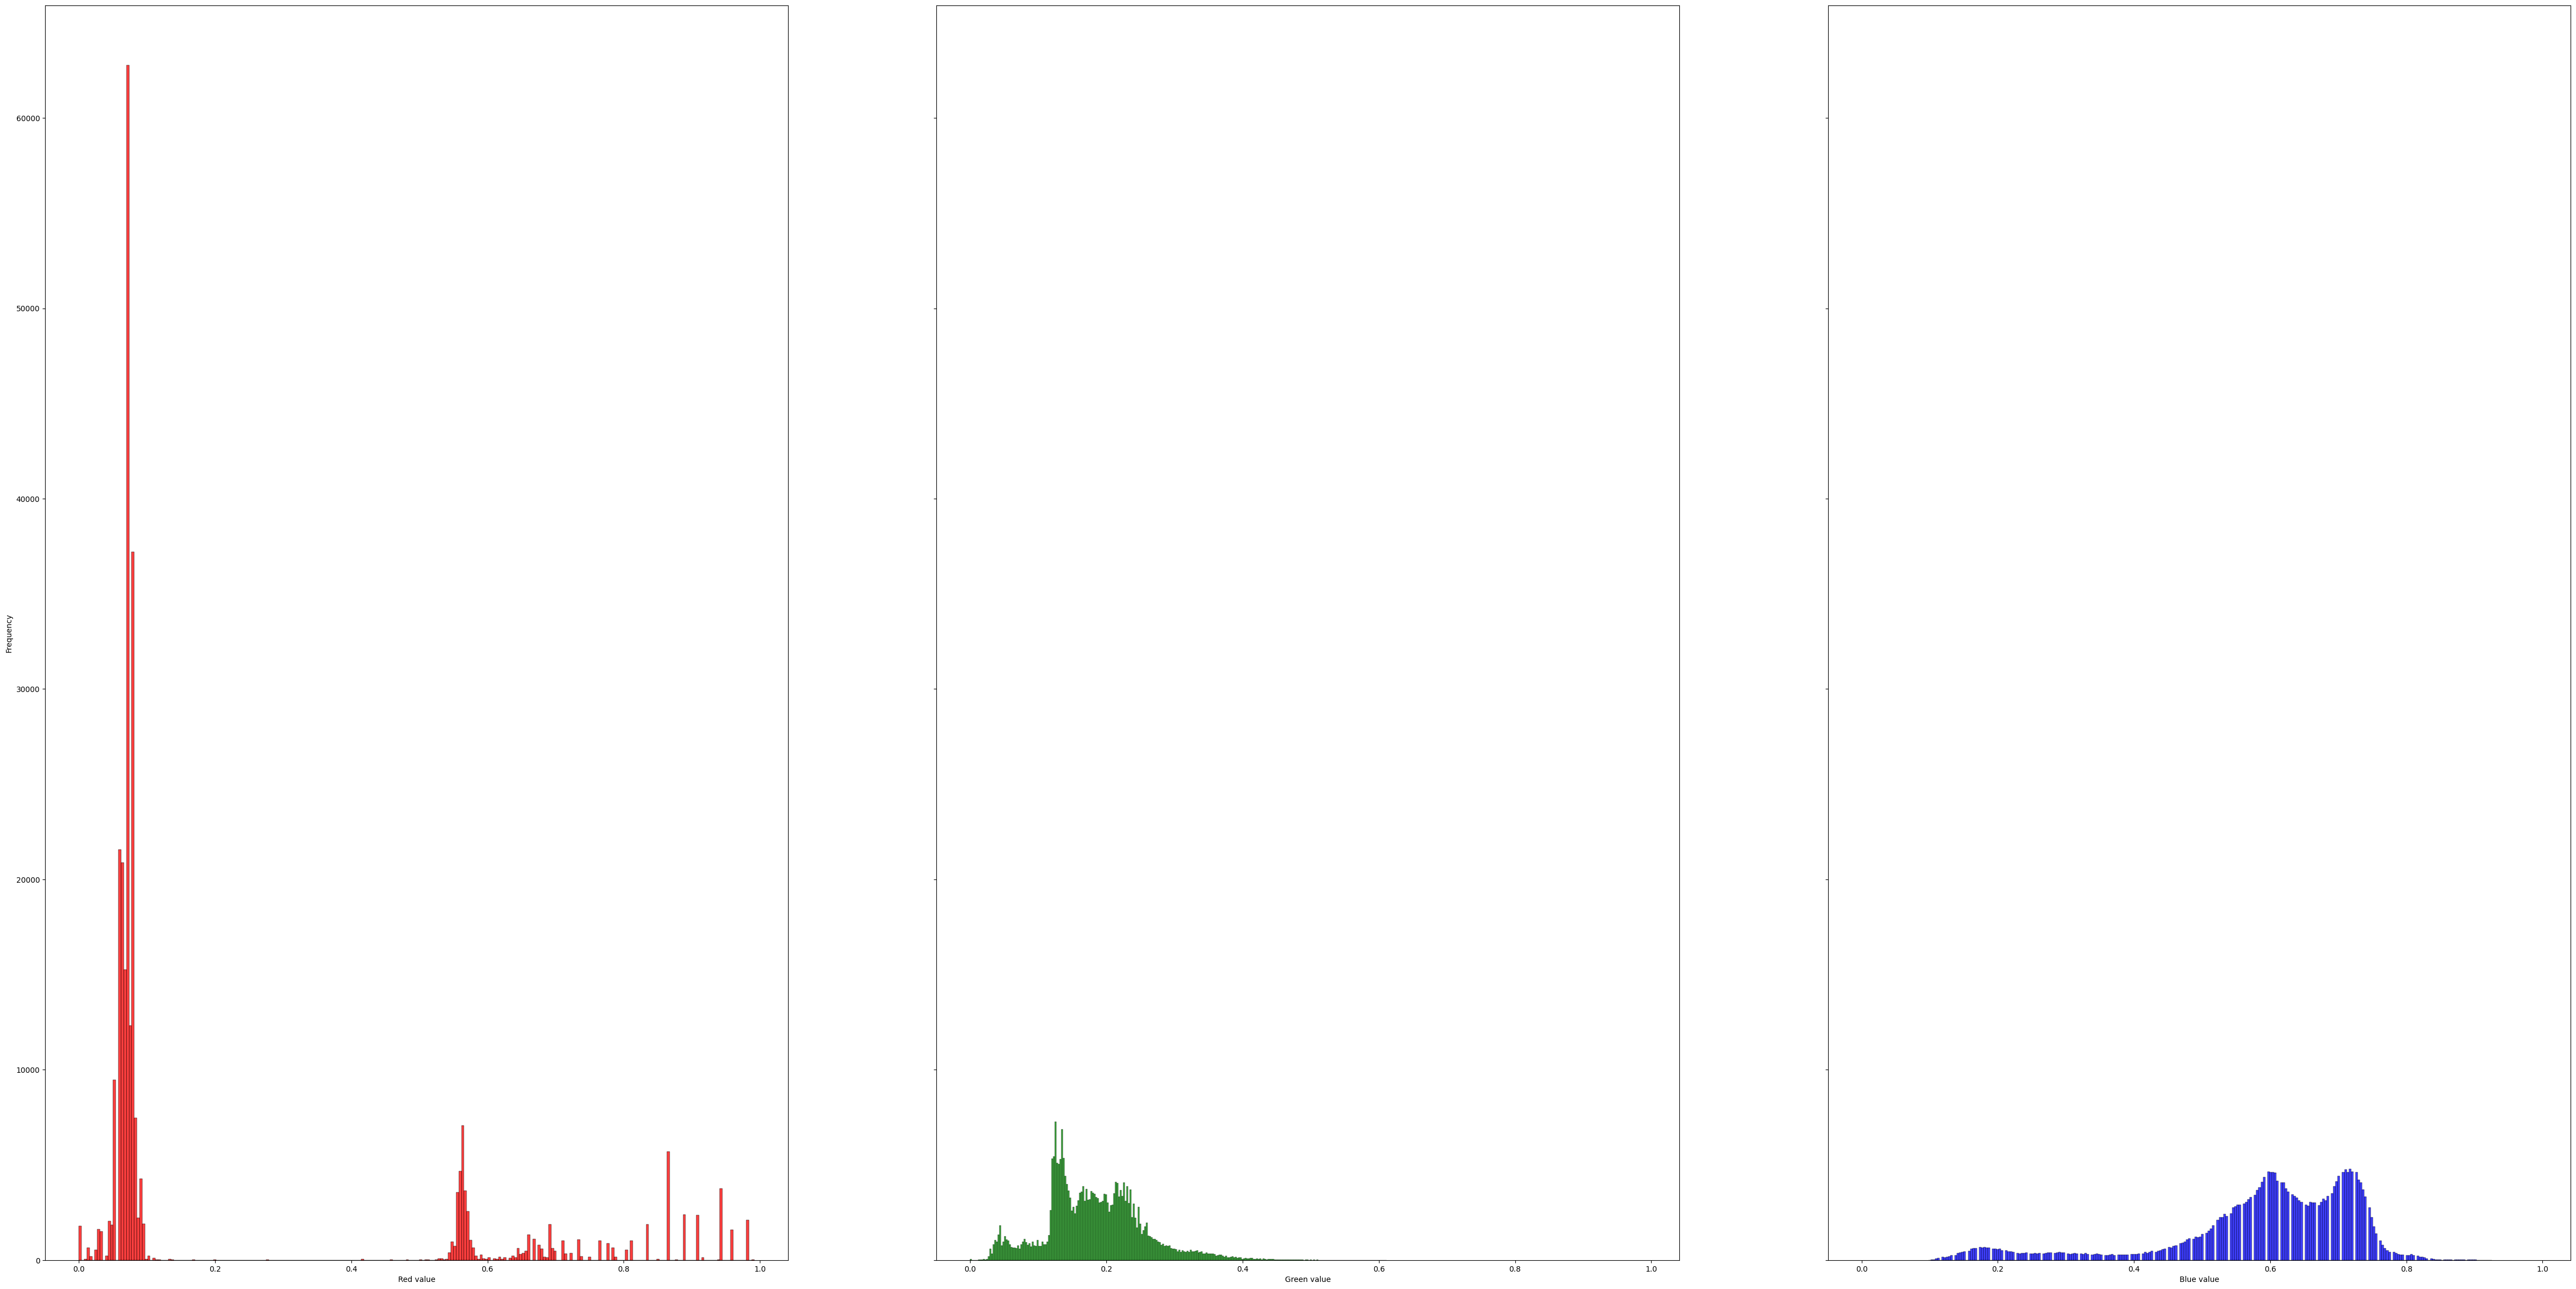

In [10]:
hsvimage = skimage.color.rgb2hsv(img)

red_hsv, green_hsv, blue_hsv = cv2.split(hsvimage)

red_hist =  red_hsv.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green_hsv.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue_hsv.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

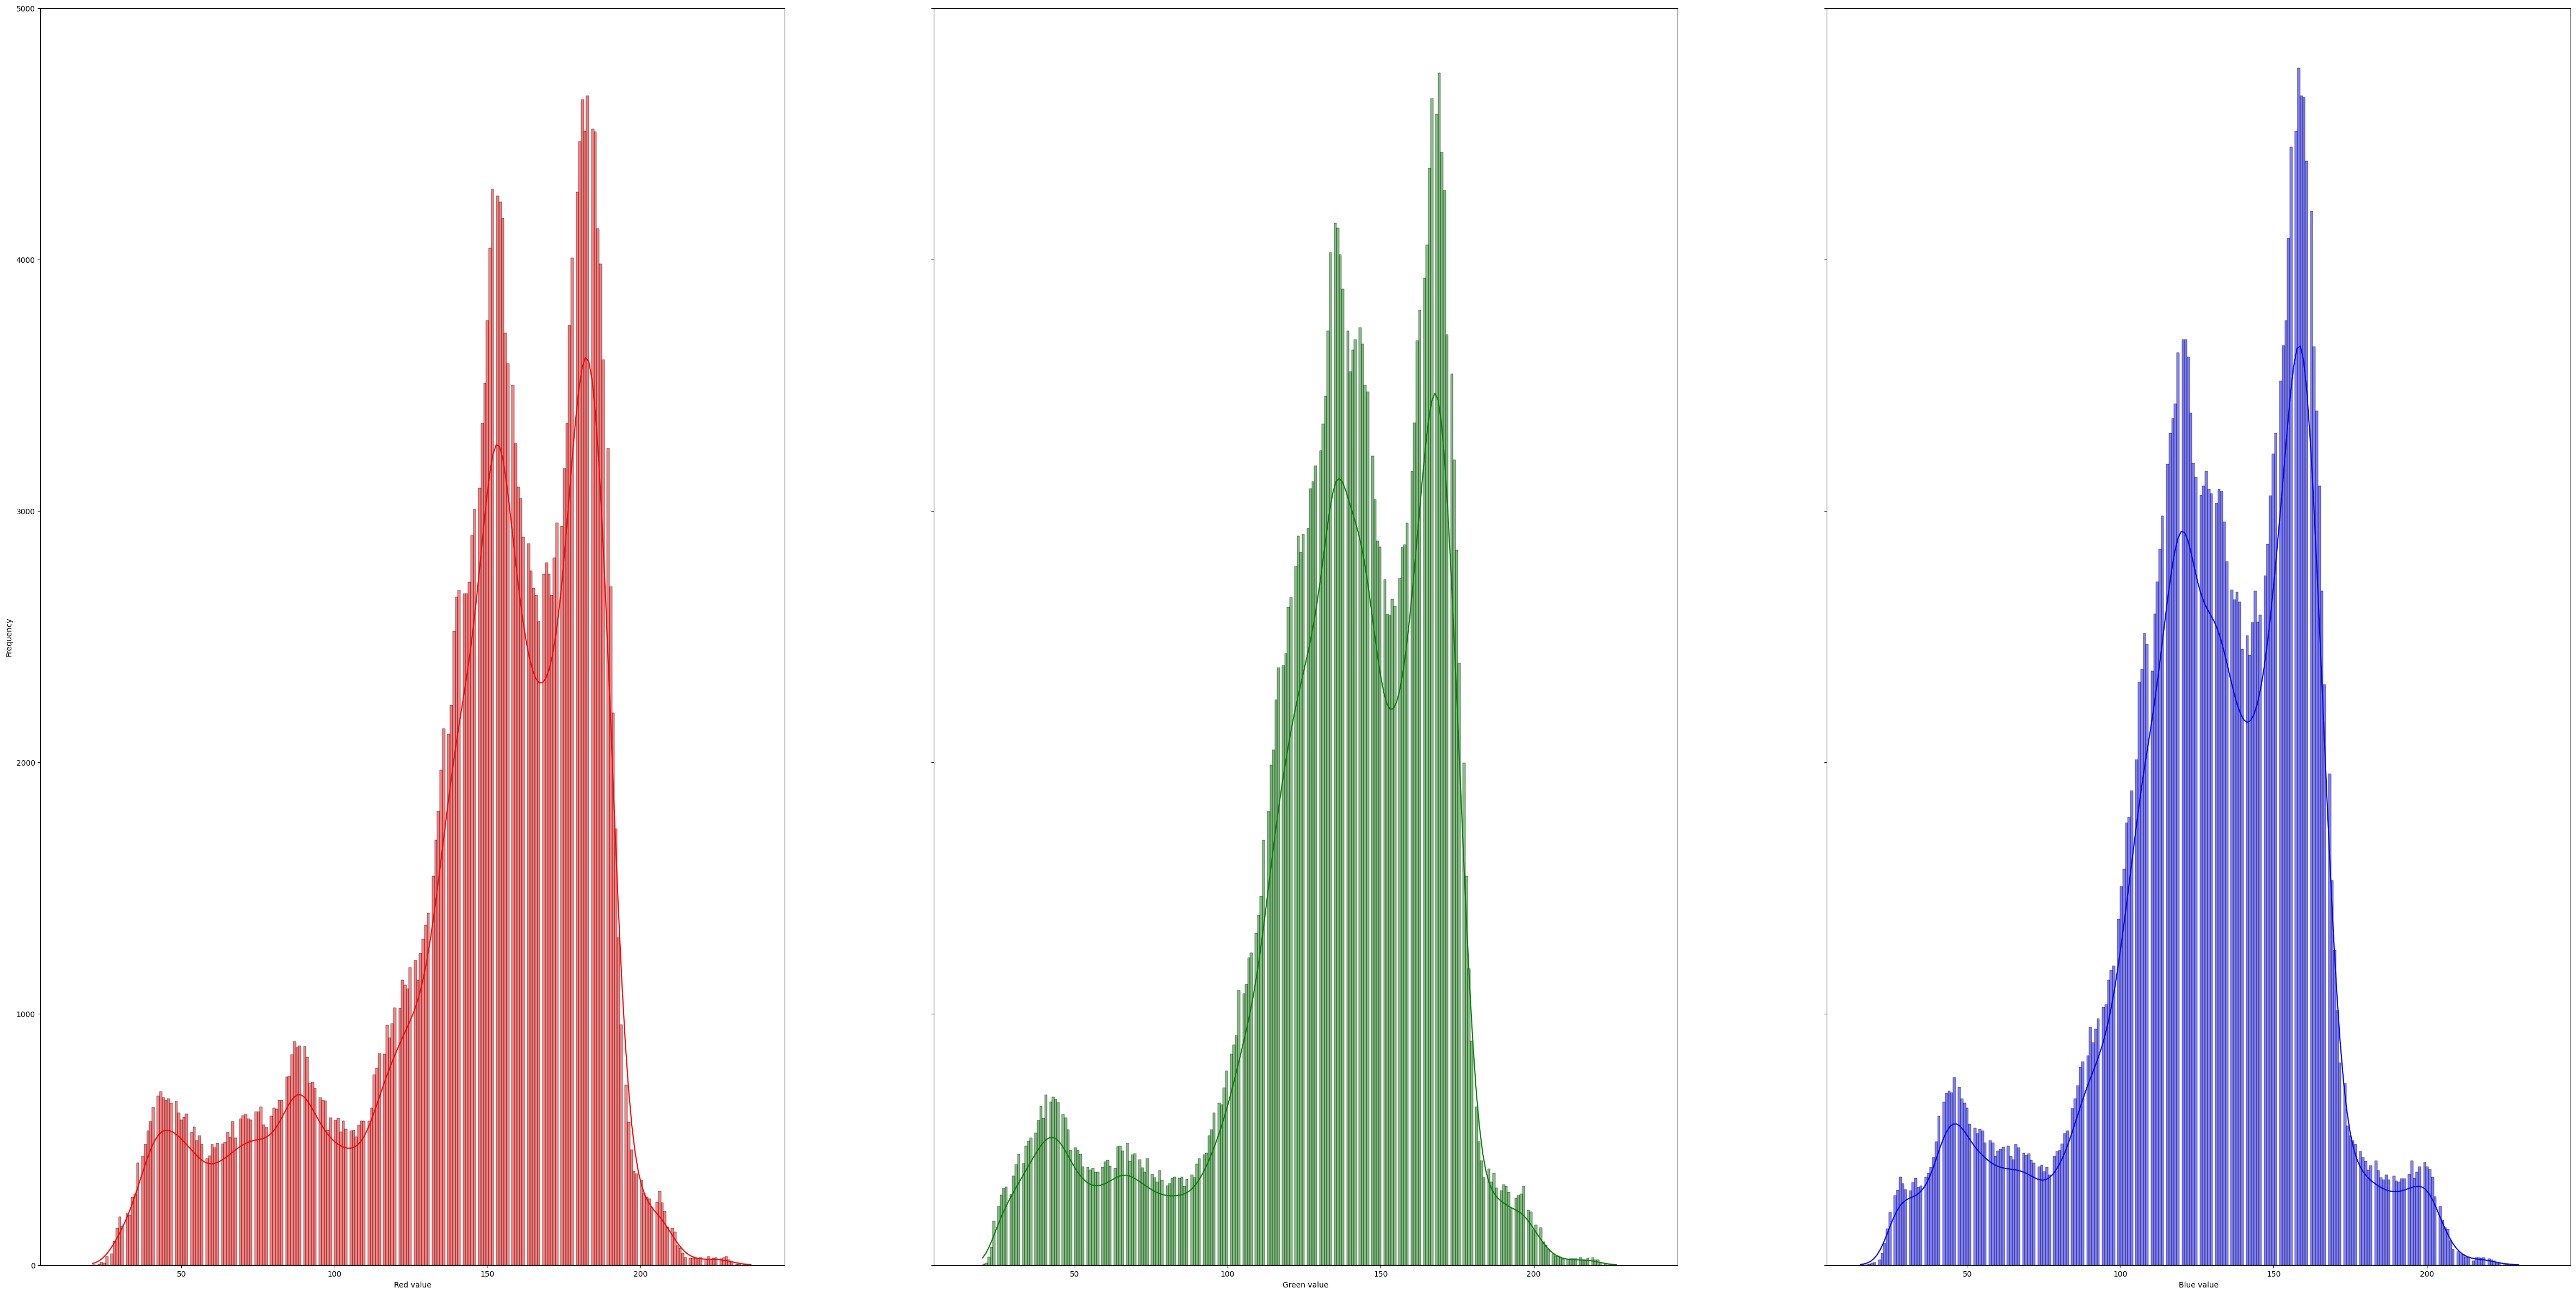

In [11]:
red_hist =  red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

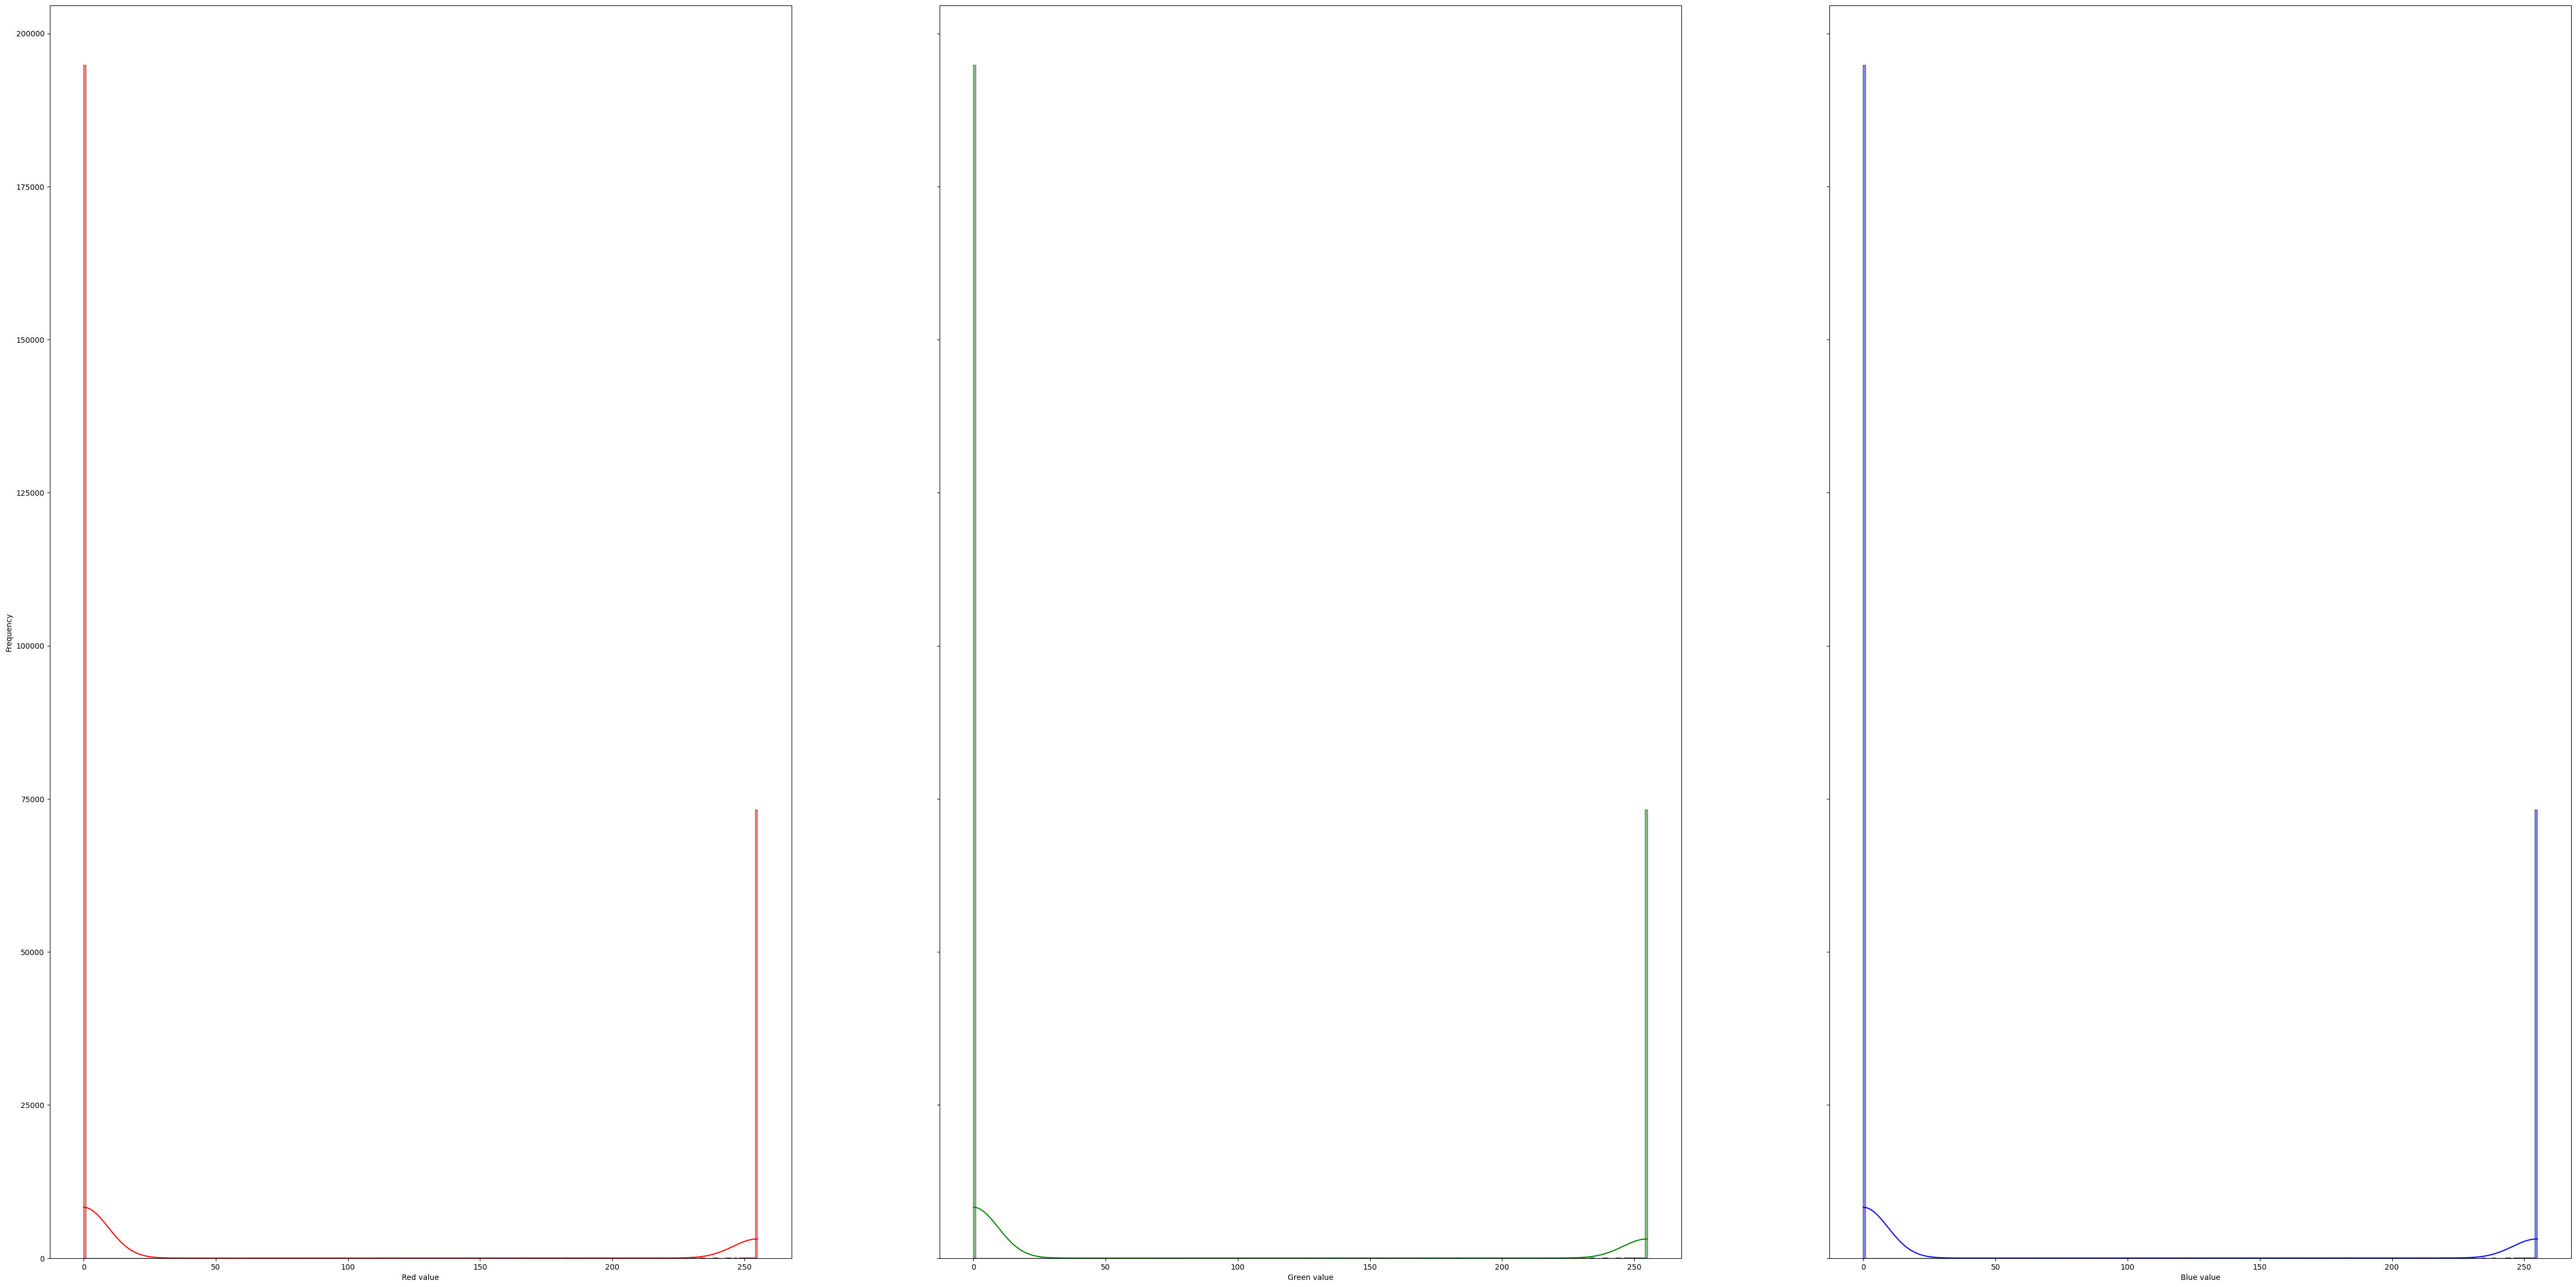

In [12]:
red_hist =  m_red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  m_green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  m_blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

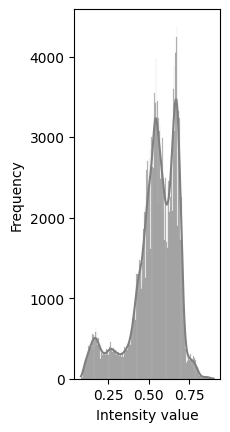

In [13]:
gray_hist =  gray_img.flatten()

plt.subplot(1,3,3)
sns.histplot( gray_hist, bins=256, kde=True,color='gray')
plt.xlabel("Intensity value")
plt.ylabel("Frequency")
plt.show()

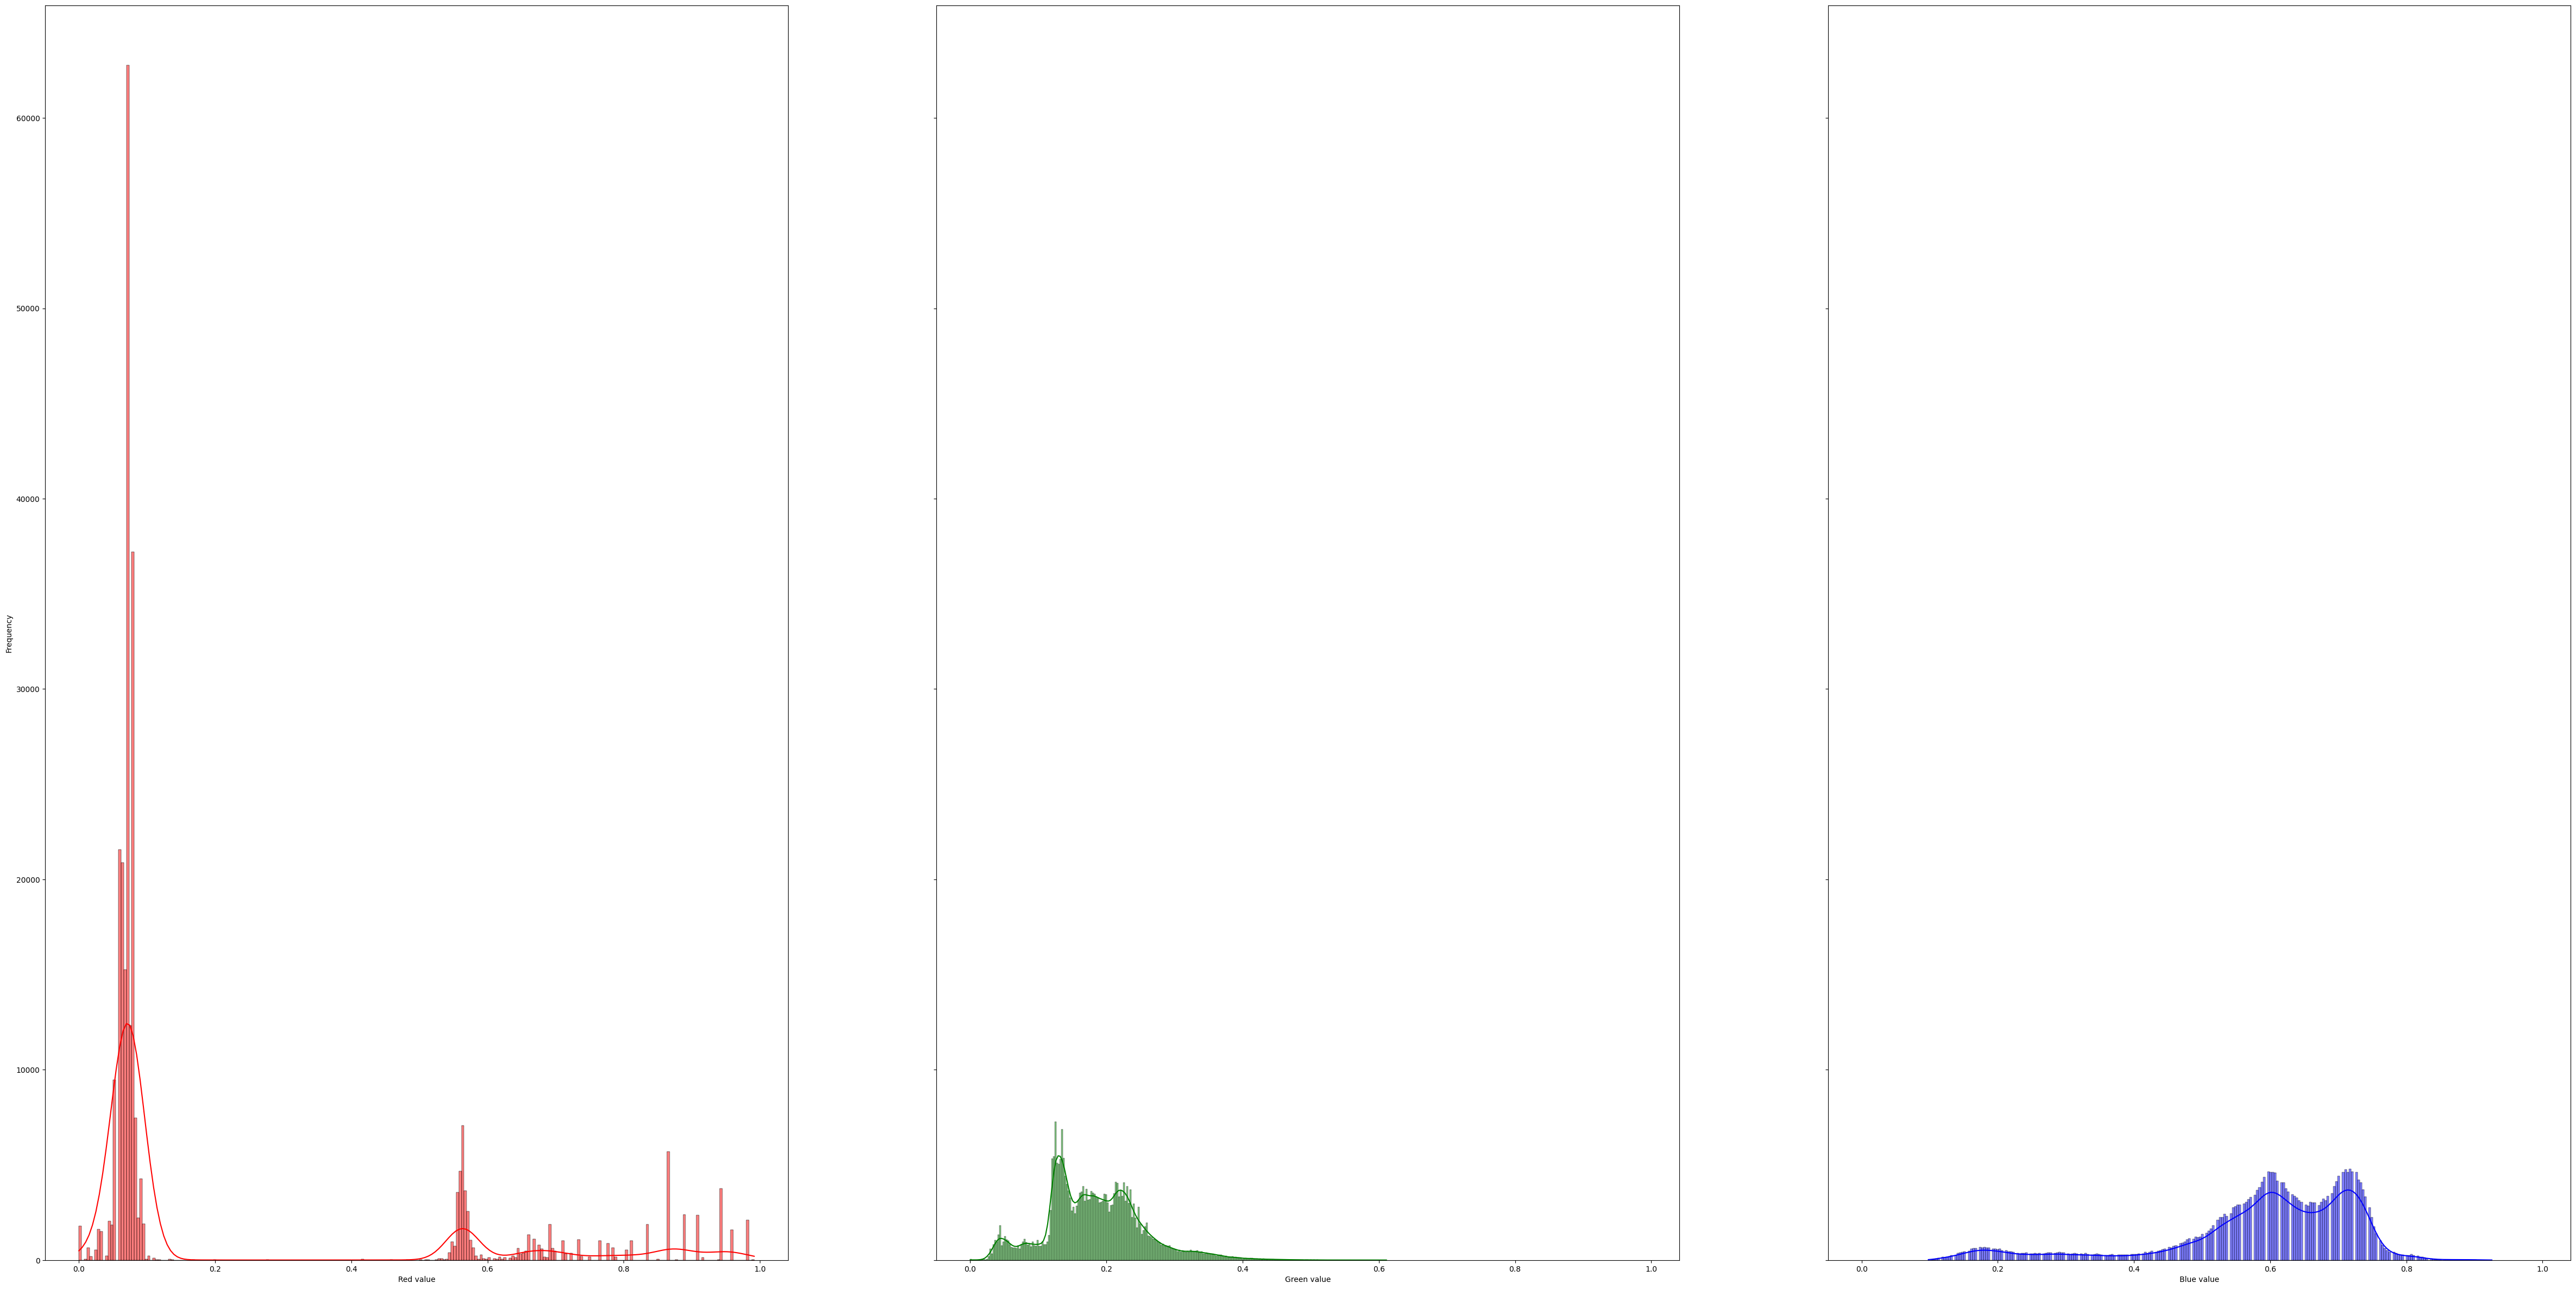

In [14]:
red_hist =  red_hsv.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green_hsv.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue_hsv.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

# 5 BackGround classifier

In [22]:
# 1
# construct custom filter

def custom_filter(size):
    return np.ones((size,size))

def convolve_filter(image,filter:np.array):
    # Pad the image
    size = len(filter)
    padding_size = size//2
    padded_image = np.pad(image, pad_width=padding_size, mode='constant', constant_values=0)
    # flip the filter
    flipped_filter = np.flipud(np.fliplr(filter))
    # convolution
    
    return_image = np.zeros_like(image)
    #iterate over the padded image
    for x in range(len(image)):
        for y in range(len(image[0])):
            
            region = padded_image[
                x:x+size,
                y:y+size
                ]
            
            conv_value = np.sum(region * flipped_filter)
            return_image[x,y] = conv_value
    return return_image       
        
def convolve_rgb(image,filter):
    # this code splits the image into each channel, convolves then merges the channels
    red, green, blue = cv2.split(image)          
    red = convolve_filter(red,filter)
    green = convolve_filter(green,filter)
    blue = convolve_filter(blue,filter)
    rgb_image = cv2.merge([red,green,blue])
    return rgb_image

vertical_prewitt = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])
horizontal_prewitt = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

laplacian = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])

image = cv2.imread("images/image-83.jpg")

# Calculate convolved images
resultant_vert_prewitt = convolve_rgb(image,vertical_prewitt)
resultant_horz_prewitt = convolve_rgb(image,horizontal_prewitt)
resultant_laplacian = convolve_rgb(image,laplacian)
# display images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(resultant_vert_prewitt)
axes[0].set_title('vert_prewit')
axes[0].axis('off')

axes[1].imshow(resultant_horz_prewitt)
axes[1].set_title('horz_prewitt')
axes[1].axis('off')

axes[2].imshow(resultant_laplacian)
axes[2].set_title('laplacian')
axes[2].axis('off')
plt.tight_layout()
plt.show()

[ WARN:0@33.108] global loadsave.cpp:241 findDecoder imread_('images/image-83.jpg'): can't open/read file: check file path/integrity


ValueError: not enough values to unpack (expected 3, got 0)

From the documentation it shows that the filter2D function does not execute convolution, it actually does correlation

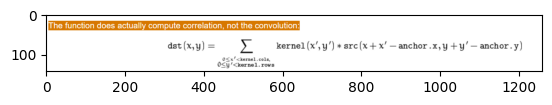

In [ ]:

image = cv2.imread("images/Documentation.png")
plt.imshow(image)
plt.show()

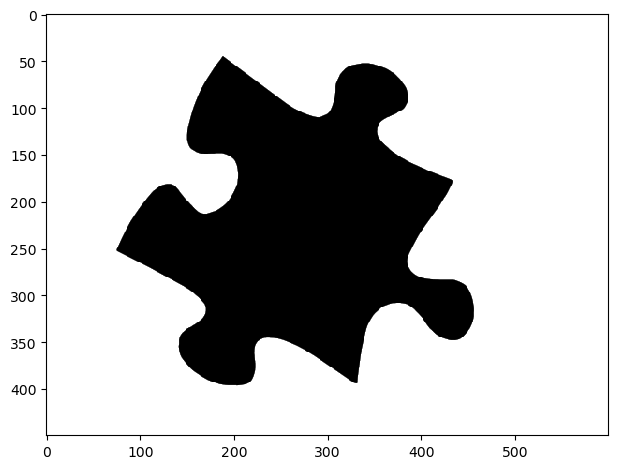

In [48]:
from skimage.io import imread, imshow

from skimage.filters import prewitt_v, prewitt_h, laplace, threshold_otsu
import cv2
# recalculating the prewitt and laplapcian to be use in this question.
# Using RGB formatting
original = imread("Images/image-35.jpg")
mask = imread("Images/mask-35.png", as_gray=True)
inverse_mask = np.zeros_like(mask)
inverse_mask = 1-mask 


In [55]:

def getFeatures(img, mask):
    mask = threshold_otsu(mask)
    training_img = skimage.img_as_float(img)*mask
    imshow(training_img)
    hsv_training_img = cv2.cvtColor(training_img, cv2.COLOR_BGR2RGB)


    v,s,h = cv2.split(hsv_training_img)
    print(h.shape)
    b,g,r = cv2.split(training_img)


    # get vertical prewitt for separated channels
    vert_prewitt_r = prewitt_v(image=r)
    vert_prewitt_g = prewitt_v(image=g)
    vert_prewitt_b = prewitt_v(image=b)

    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))


    plt.subplot(1,3,1), plt.imshow( vert_prewitt_r,cmap="gray"), plt.axis("off")
    plt.subplot(1,3,2), plt.imshow( vert_prewitt_g,cmap="gray"), plt.axis("off")
    plt.subplot(1,3,3), plt.imshow( vert_prewitt_b,cmap="gray"), plt.axis("off")
    plt.suptitle("Vertical Prewitt of RGB image")
    plt.show()

    # get horizontal prewitt for separated channels
    hori_prewitt_r = prewitt_h(image=r)
    hori_prewitt_g = prewitt_h(image=g)
    hori_prewitt_b = prewitt_h(image=b)

    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))


    plt.subplot(1,3,1), plt.imshow( hori_prewitt_r,cmap="gray"), plt.axis("off")
    plt.subplot(1,3,2), plt.imshow( hori_prewitt_g,cmap="gray"), plt.axis("off")
    plt.subplot(1,3,3), plt.imshow( hori_prewitt_b,cmap="gray"), plt.axis("off")
    plt.suptitle("Horizontal Prewitt of RGB image")
    plt.show()

    # get Laplacian for separated channels
    laplace_r = laplace(image=r)
    laplace_g = laplace(image=g)
    laplace_b = laplace(image=b)

    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))


    plt.subplot(1,3,1), plt.imshow( laplace_r,cmap="gray"), plt.axis("off")
    plt.subplot(1,3,2), plt.imshow( laplace_g,cmap="gray"), plt.axis("off")
    plt.subplot(1,3,3), plt.imshow( laplace_b,cmap="gray"), plt.axis("off")
    plt.suptitle("Laplacian of RGB image")
    plt.show()
    return np.array([vert_prewitt_r.flatten(), hori_prewitt_r.flatten(), vert_prewitt_g.flatten(), hori_prewitt_g.flatten(),
 vert_prewitt_b.flatten(), hori_prewitt_b.flatten(), laplace_r.flatten(), laplace_g.flatten(), laplace_b.flatten(), r.flatten(),g.flatten(),b.flatten(),h.flatten(),s.flatten(),v.flatten()])

error: OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


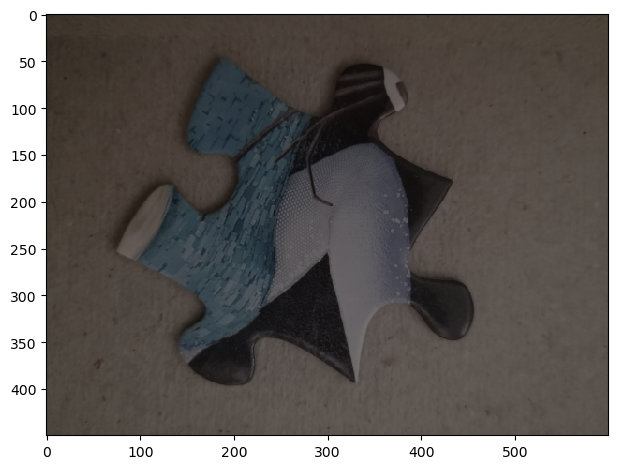

In [56]:
# get the feature for fg and bg
fg_features = getFeatures(original, mask)
bg_features = getFeatures(original, inverse_mask)

Mean and covariance matrix


In [44]:

#make each feature a row in the matrix
feature_matrix = np.stack(features, axis=-1)
mean_vector = np.mean(feature_matrix, axis=0)
cov_matrix = np.cov(feature_matrix, rowvar=False)
print(mean_vector)
print(cov_matrix.shape)

[ 4.89615105e-04  7.00508351e-04  4.52810458e-04  6.31023965e-04
  4.40000000e-04  5.61190995e-04  3.36767651e-19 -2.75499788e-19
 -6.83403951e-19  1.28892185e+02  1.35566778e+02  1.46035300e+02
  1.46035300e+02  1.35566778e+02  1.28892185e+02]
(15, 15)


In [ ]:
# definition of Bayes rule

def foreground_given_pixel()